# Preprocessing

**Importing Necessary Libraries**

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import kerastuner as kt
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
column_names = ['Frequency', 'Angle_of_Attack', 'Chord_Length', 'Free-stream_Velocity', 'Suction_Side_Displacement_Thickness', 'Sound_Pressure_Level']
data = pd.read_csv("/kaggle/input/uci-airfoil-self-noise-database/airfoil_self_noise.dat", delim_whitespace=True, names=column_names)

/tmp/ipykernel_34/2753308598.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("/kaggle/input/uci-airfoil-self-noise-database/airfoil_self_noise.dat", delim_whitespace=True, names=column_names)


In [29]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Frequency                            1503 non-null   int64  
 1   Angle_of_Attack                      1503 non-null   float64
 2   Chord_Length                         1503 non-null   float64
 3   Free-stream_Velocity                 1503 non-null   float64
 4   Suction_Side_Displacement_Thickness  1503 non-null   float64
 5   Sound_Pressure_Level                 1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB
None


In [30]:
print(data.describe())

          Frequency  Angle_of_Attack  Chord_Length  Free-stream_Velocity  \
count   1503.000000      1503.000000   1503.000000           1503.000000   
mean    2886.380572         6.782302      0.136548             50.860745   
std     3152.573137         5.918128      0.093541             15.572784   
min      200.000000         0.000000      0.025400             31.700000   
25%      800.000000         2.000000      0.050800             39.600000   
50%     1600.000000         5.400000      0.101600             39.600000   
75%     4000.000000         9.900000      0.228600             71.300000   
max    20000.000000        22.200000      0.304800             71.300000   

       Suction_Side_Displacement_Thickness  Sound_Pressure_Level  
count                          1503.000000           1503.000000  
mean                              0.011140            124.835943  
std                               0.013150              6.898657  
min                               0.000401     

In [31]:
print(data.isnull().sum())

Frequency                              0
Angle_of_Attack                        0
Chord_Length                           0
Free-stream_Velocity                   0
Suction_Side_Displacement_Thickness    0
Sound_Pressure_Level                   0
dtype: int64


**Distribution of Features**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

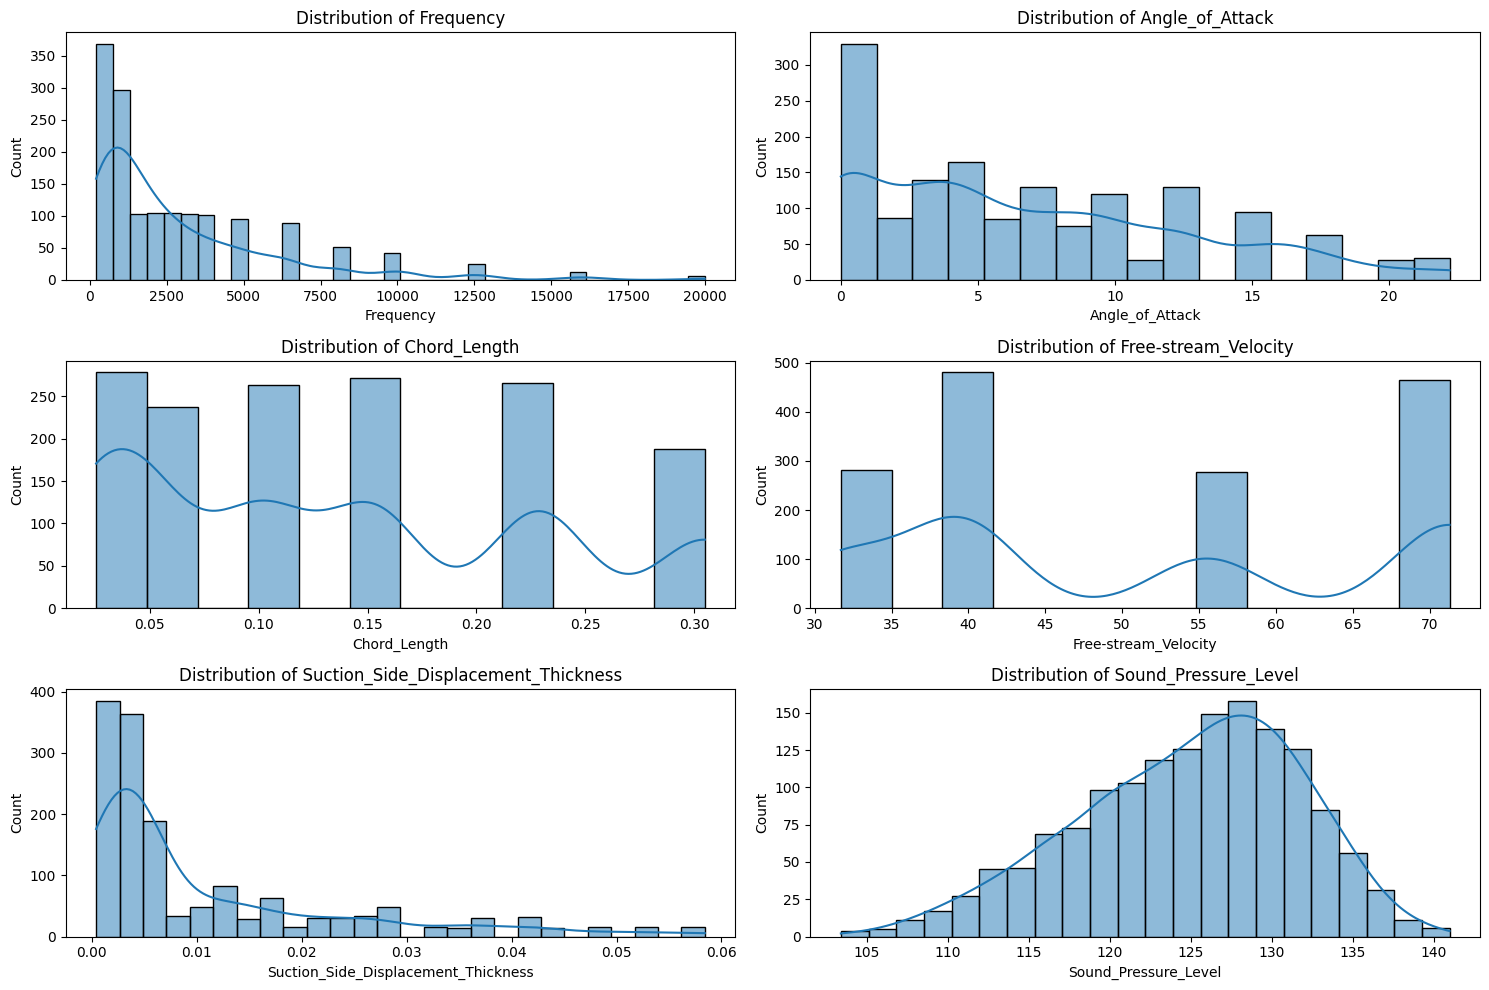

In [32]:
# Plot the distributions of the features and the target variable
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

**Correlation Matrix**

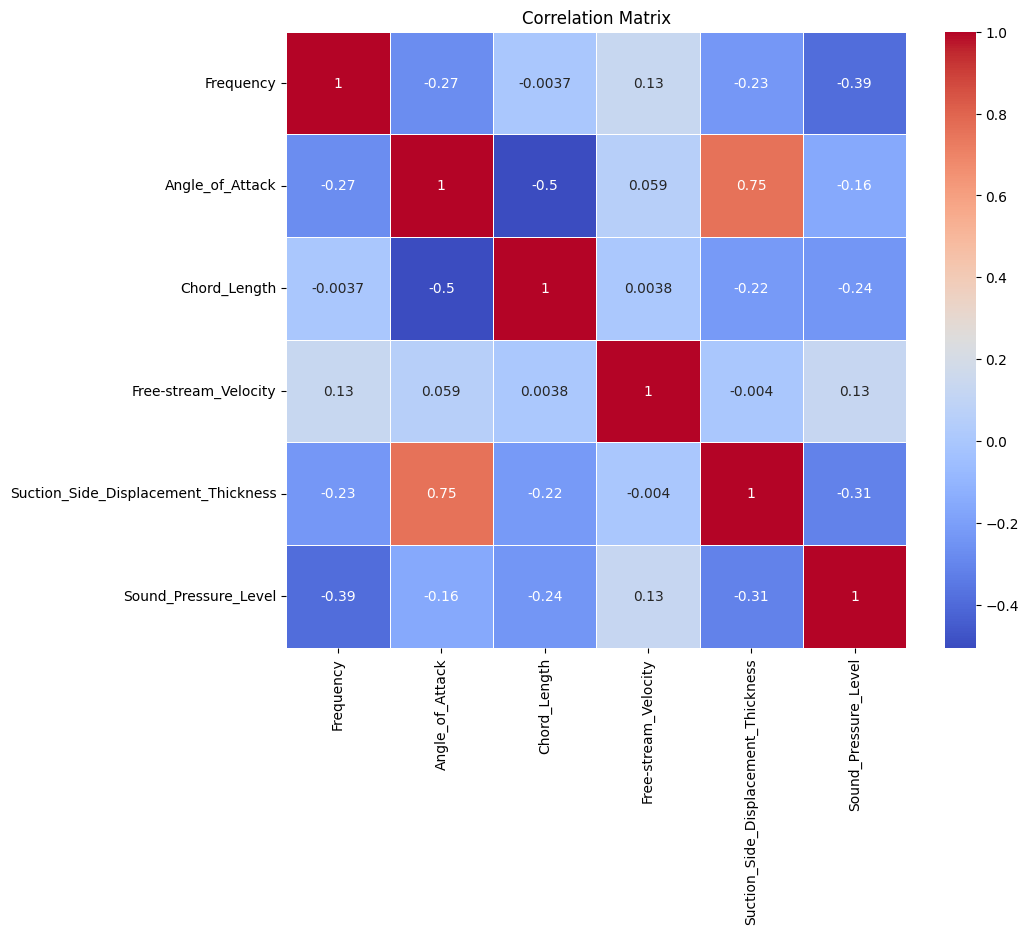

In [33]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [34]:
X = data.drop('Sound_Pressure_Level', axis=1)
y = data['Sound_Pressure_Level']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Linear Regression**

In [37]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")

Linear Regression - MSE: 22.128643318247274, R2: 0.5582979754897286


**Polynomial Regression**

* Degree - 2

In [38]:
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train_scaled)
X_test_poly2 = poly2.transform(X_test_scaled)

poly2_model = LinearRegression()
poly2_model.fit(X_train_poly2, y_train)
y_pred_poly2 = poly2_model.predict(X_test_poly2)

# Evaluation
mse_poly2 = mean_squared_error(y_test, y_pred_poly2)
r2_poly2 = r2_score(y_test, y_pred_poly2)
print(f"Polynomial Regression (Degree 2) - MSE: {mse_poly2}, R2: {r2_poly2}")


Polynomial Regression (Degree 2) - MSE: 15.828208741777894, R2: 0.6840587222150485


* Degree - 3

In [39]:
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train_scaled)
X_test_poly3 = poly3.transform(X_test_scaled)

poly3_model = LinearRegression()
poly3_model.fit(X_train_poly3, y_train)
y_pred_poly3 = poly3_model.predict(X_test_poly3)

# Evaluation
mse_poly3 = mean_squared_error(y_test, y_pred_poly3)
r2_poly3 = r2_score(y_test, y_pred_poly3)
print(f"Polynomial Regression (Degree 3) - MSE: {mse_poly3}, R2: {r2_poly3}")

Polynomial Regression (Degree 3) - MSE: 12.057144232130122, R2: 0.7593316074305976


**Decision Tree**

In [40]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree Regression - MSE: {mse_dt}, R2: {r2_dt}")

Decision Tree Regression - MSE: 5.876174498338868, R2: 0.8827077586744035


**Random Forest**

In [41]:
# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


rf = RandomForestRegressor(random_state=42)


grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)


grid_search_rf.fit(X_train_scaled, y_train)


best_params_rf = grid_search_rf.best_params_
best_rf = grid_search_rf.best_estimator_

# Evaluation
y_pred_best_rf = best_rf.predict(X_test_scaled)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f"Best Random Forest - MSE: {mse_best_rf}, R2: {r2_best_rf}")
print(f"Best parameters: {best_params_rf}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Random Forest - MSE: 3.315573926563781, R2: 0.9338190012503356
Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


**Gradient Boosting Regressor**

In [42]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb = GradientBoostingRegressor(random_state=42)


grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=3, n_jobs=-1, verbose=2)


grid_search_gb.fit(X_train_scaled, y_train)


best_params_gb = grid_search_gb.best_params_
best_gb = grid_search_gb.best_estimator_

# Evaluation
y_pred_best_gb = best_gb.predict(X_test_scaled)
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)
print(f"Best Gradient Boosting - MSE: {mse_best_gb}, R2: {r2_best_gb}")
print(f"Best parameters: {best_params_gb}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Gradient Boosting - MSE: 2.685346008153845, R2: 0.9463987578789318
Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}


**Neural Network**

In [56]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32), activation='relu'))
        model.add(Dropout(hp.Float('dropout_' + str(i), min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='airfoil_nn_tuning'
)

tuner.search(X_train_scaled, y_train, epochs=75, validation_split=0.2)

best_nn_model = tuner.get_best_models(num_models=1)[0]
best_nn_model.summary()

# Evaluation
y_pred_best_nn = best_nn_model.predict(X_test_scaled).flatten()
mse_best_nn = mean_squared_error(y_test, y_pred_best_nn)
r2_best_nn = r2_score(y_test, y_pred_best_nn)
print(f"Tuned Neural Network - MSE: {mse_best_nn}, R2: {r2_best_nn}")

Reloading Tuner from my_dir/airfoil_nn_tuning/tuner0.json


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 288)            │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 416)            │       120,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 416)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 416)            │       173,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 416)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │        13,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 308,801 (1.18 MB)

 Trainable params: 308,801 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Tuned Neural Network - MSE: 17.24690441906232, R2: 0.6557406394565011


**Ensemble Learning**

In [44]:
ensemble_model = VotingRegressor(estimators=[
    ('rf', best_rf), 
    ('gb', best_gb)
])


ensemble_model.fit(X_train_scaled, y_train)

#Evaluation
y_pred_ensemble = ensemble_model.predict(X_test_scaled)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)
print(f"Ensemble Model - MSE: {mse_ensemble}, R2: {r2_ensemble}")


Ensemble Model - MSE: 2.669418830771295, R2: 0.9467166746347596


# Model Evaluation

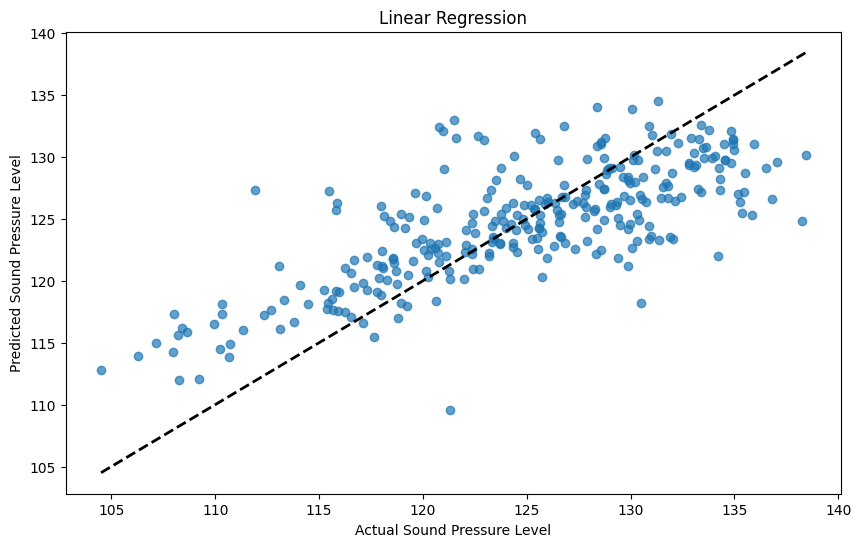

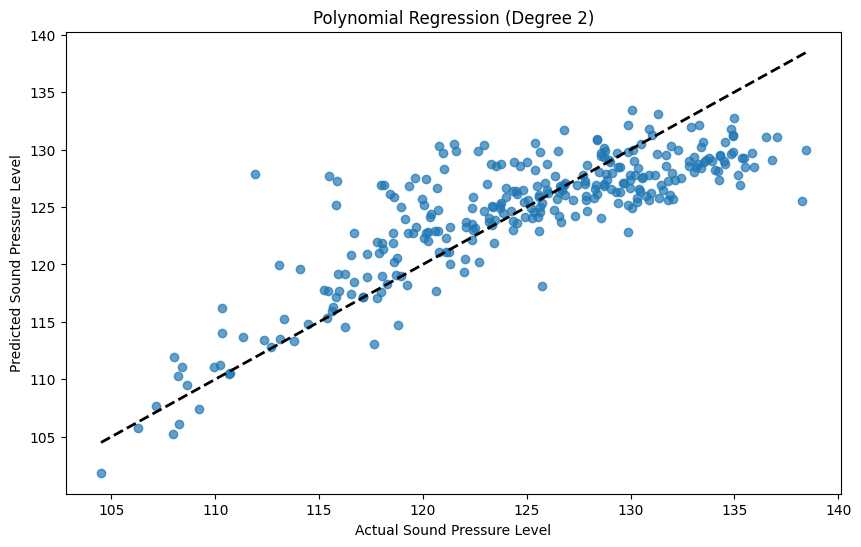

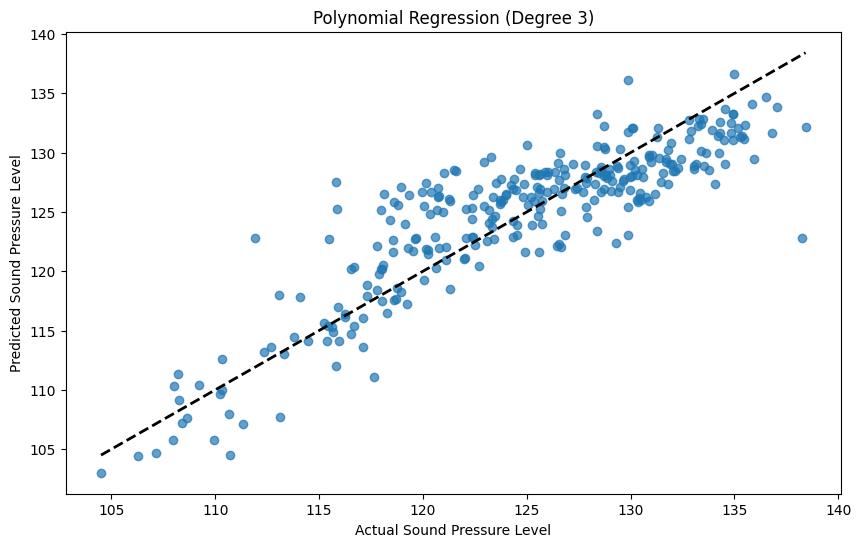

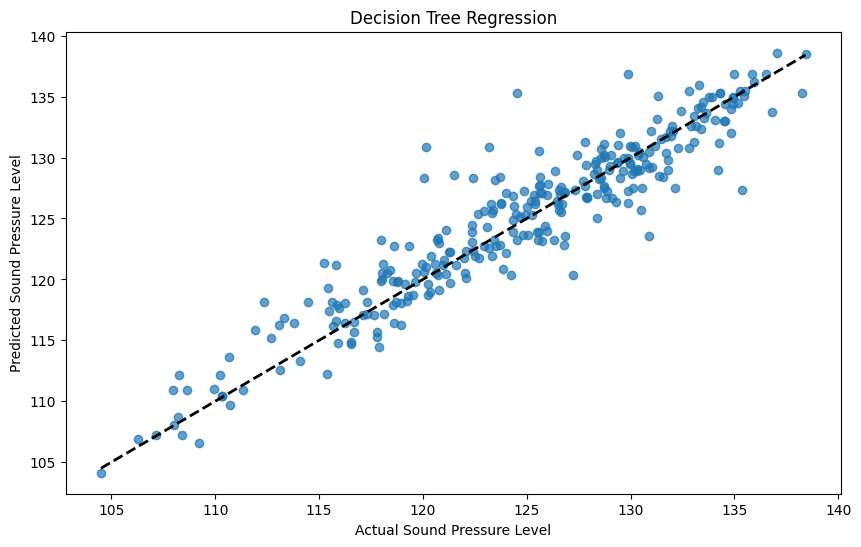

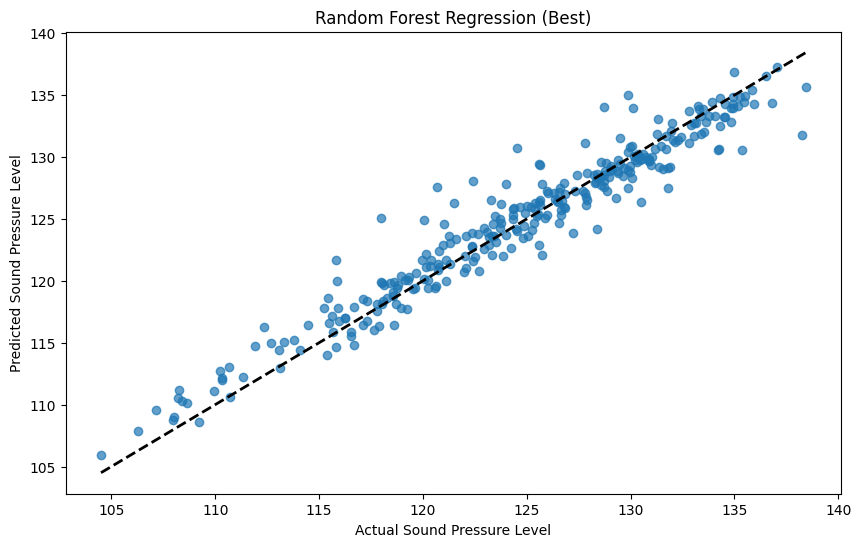

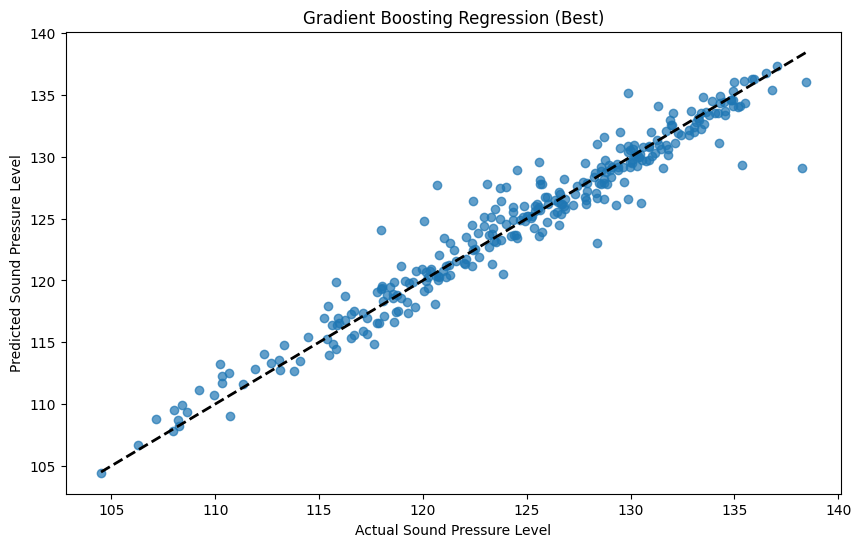

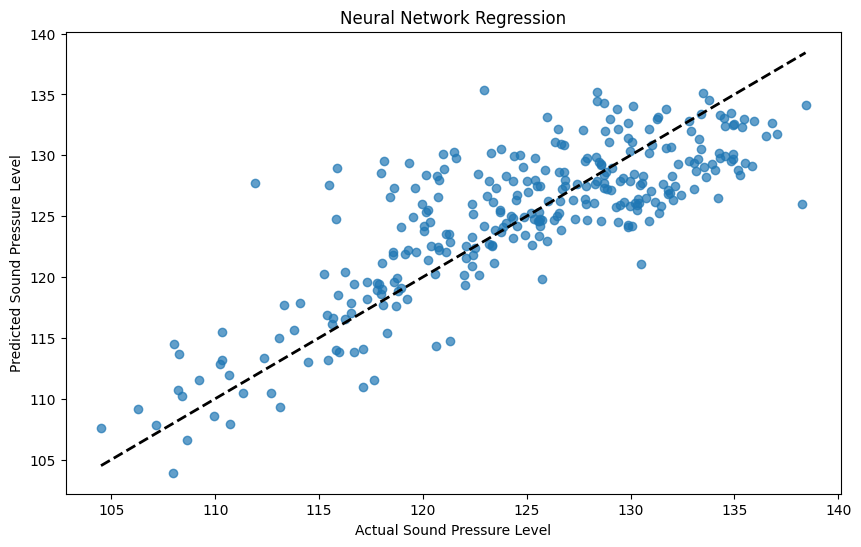

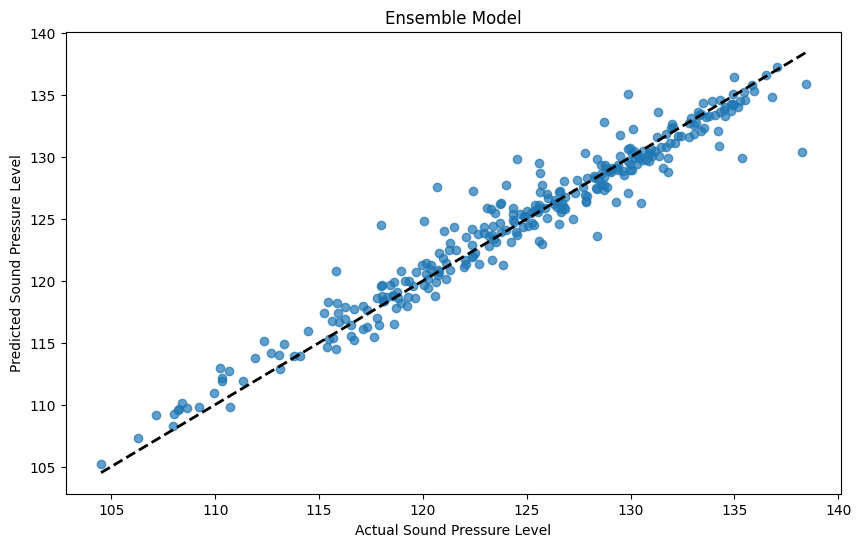

In [46]:
# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel('Actual Sound Pressure Level')
    plt.ylabel('Predicted Sound Pressure Level')
    plt.title(title)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.show()

# Plot for each model
plot_actual_vs_predicted(y_test, y_pred_lr, 'Linear Regression')
plot_actual_vs_predicted(y_test, y_pred_poly2, 'Polynomial Regression (Degree 2)')
plot_actual_vs_predicted(y_test, y_pred_poly3, 'Polynomial Regression (Degree 3)')
plot_actual_vs_predicted(y_test, y_pred_dt, 'Decision Tree Regression')
plot_actual_vs_predicted(y_test, y_pred_best_rf, 'Random Forest Regression (Best)')
plot_actual_vs_predicted(y_test, y_pred_best_gb, 'Gradient Boosting Regression (Best)')
plot_actual_vs_predicted(y_test, y_pred_best_nn, 'Neural Network Regression')
plot_actual_vs_predicted(y_test, y_pred_ensemble, 'Ensemble Model')

# Model Performance Comparison

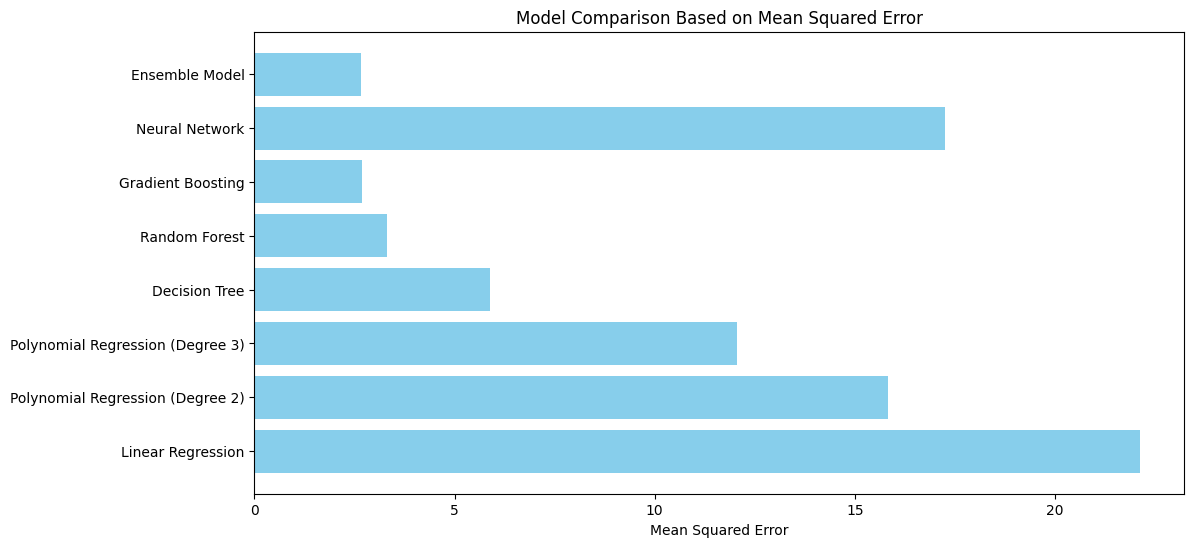

[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END .max

In [49]:
# Compare models based on MSE
model_names = ['Linear Regression', 'Polynomial Regression (Degree 2)', 'Polynomial Regression (Degree 3)', 
               'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Neural Network', 'Ensemble Model']
mse_values = [mse_lr, mse_poly2, mse_poly3, mse_dt, mse_best_rf, mse_best_gb, mse_best_nn, mse_ensemble]

plt.figure(figsize=(12, 6))
plt.barh(model_names, mse_values, color='skyblue')
plt.xlabel('Mean Squared Error')
plt.title('Model Comparison Based on Mean Squared Error')
plt.show()

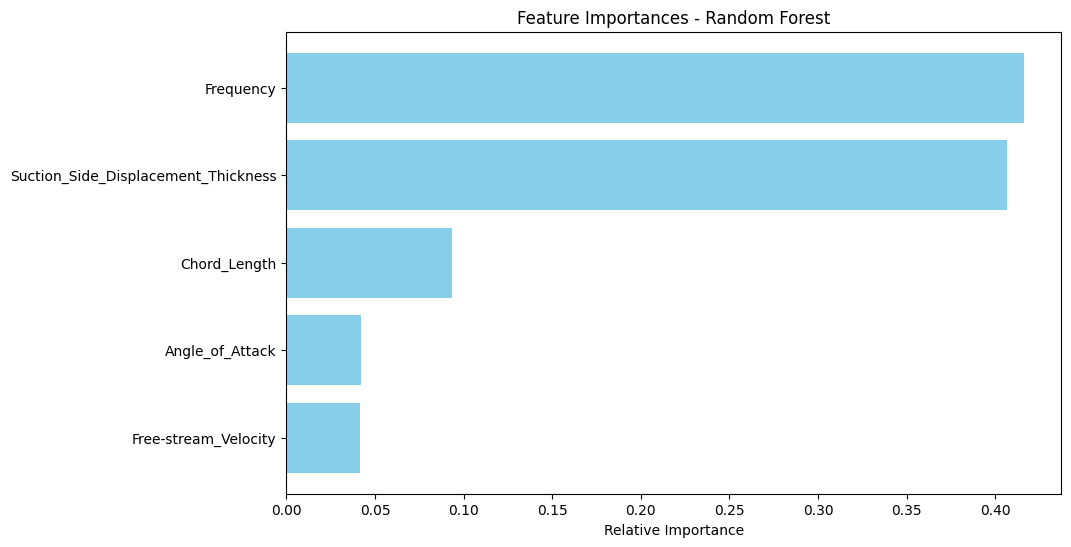

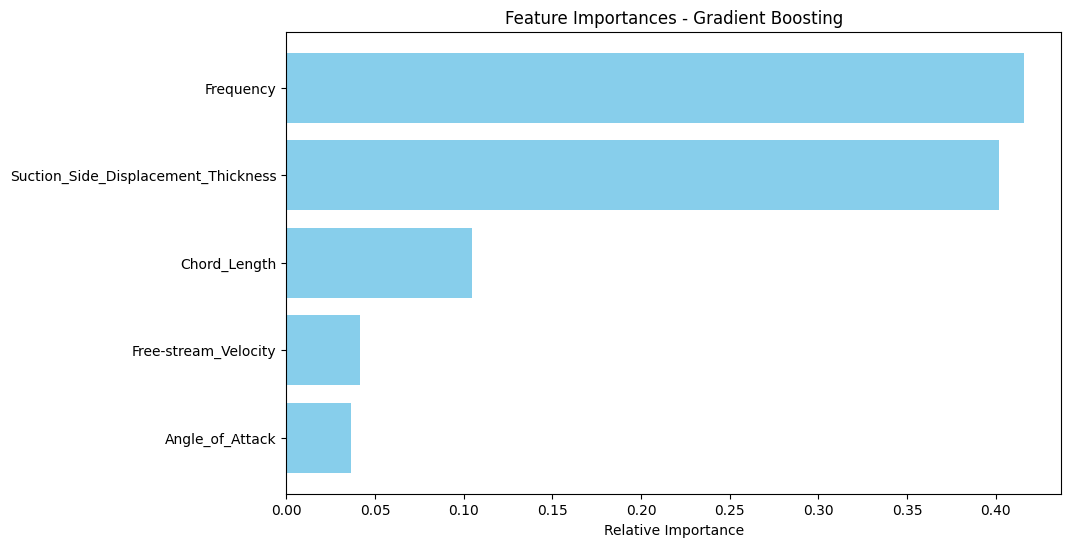

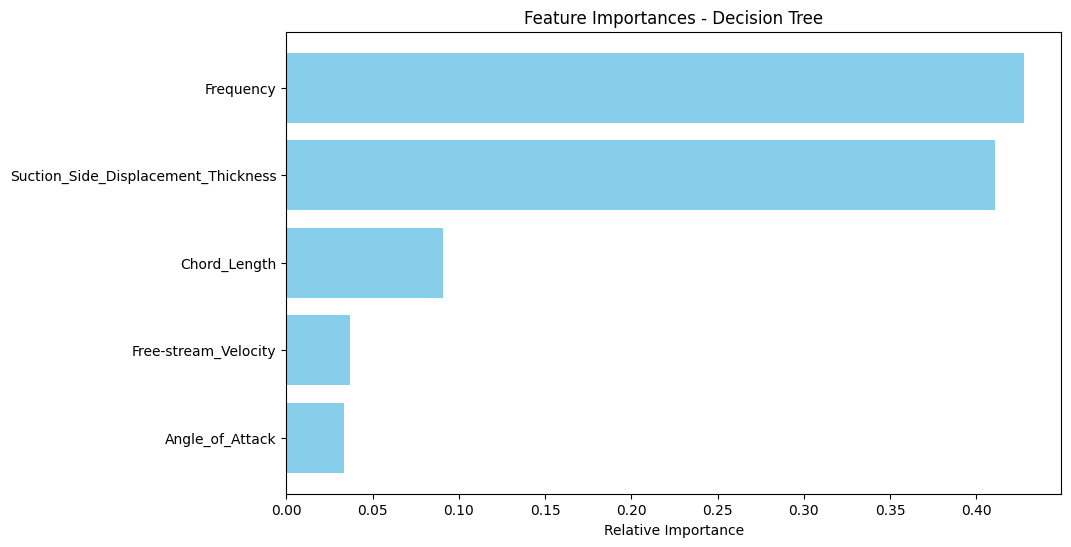

In [54]:
# Feature importances for Random Forest and Gradient Boosting
importances_rf = best_rf.feature_importances_
importances_gb = best_gb.feature_importances_
importances_dt = dt_model.feature_importances_

# Plot feature importances
def plot_feature_importances(importances, model_name):
    indices = np.argsort(importances)
    features = X.columns

    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importances - {model_name}')
    plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

plot_feature_importances(importances_rf, 'Random Forest')
plot_feature_importances(importances_gb, 'Gradient Boosting')
plot_feature_importances(importances_dt, 'Decision Tree')